In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import kagglehub
import os


In [5]:
path = kagglehub.dataset_download('sahilchambyal/mnist-pixels')
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

100%|██████████| 9.16M/9.16M [00:00<00:00, 53.7MB/s]

Extracting files...


/root/.cache/kagglehub/datasets/sahilchambyal/mnist-pixels/versions/1/train.csv


In [6]:
data = pd.read_csv('/root/.cache/kagglehub/datasets/sahilchambyal/mnist-pixels/versions/1/train.csv')

In [7]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

In [9]:
data_dev = data[:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [10]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLu(Z):
  return np.maximum(Z, 0)

def softmax(Z):
  A = np.exp(Z) / sum(np.exp(Z))
  return A

def forward_prop(W1, b1, W2, b2, X):
  Z1 = W1.dot(X) + b1
  A1 = ReLu(Z1)
  Z2 = W2.dot(A1) + b2
  A2 = softmax(Z2)
  return Z1, A1, Z2, A2

def one_hot(Y):
  one_hot_Y = np.zeros((Y.size, Y.max() + 1))
  one_hot_Y[np.arange(Y.size), Y] = 1
  one_hot_Y = one_hot_Y.T
  return one_hot_Y

def deriv_ReLu(Z):
  return Z > 0

def back_prop(Z1, A1, Z2, A2, W2, X, Y):
  m = Y.size
  one_hot_Y = one_hot(Y)
  dZ2 = A2 - one_hot_Y
  dW2 = 1 / m * dZ2.dot(A1.T)
  db2 = 1 / m * np.sum(dZ2)
  dZ1 = W2.T.dot(dZ2) * deriv_ReLu(Z1)
  dW1 = 1 / m * dZ1.dot(X.T)
  db1 = 1 / m * np.sum(dZ1)
  return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
  W1 = W1 - alpha * dW1
  b1 = b1 - alpha * db1
  W2 = W2 - alpha * dW2
  b2 = b2 - alpha * db2
  return W1, b1, W2, b2

def get_predictions(A2):
  return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
  print(predictions, Y)
  return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
  W1, b1, W2, b2 = init_params()
  for i in range(iterations):
    Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
    dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y)
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
    if i % 50 == 0:
      print("Iteration: ", i)
      print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
  return W1, b1, W2, b2


In [11]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.3, 1000)

Iteration:  0
[6 9 6 ... 4 6 6] [4 3 6 ... 1 2 0]
Accuracy:  0.0864390243902439
Iteration:  50
[9 9 6 ... 2 3 0] [4 3 6 ... 1 2 0]
Accuracy:  0.6104634146341463
Iteration:  100
[4 9 6 ... 1 2 0] [4 3 6 ... 1 2 0]
Accuracy:  0.7610731707317073
Iteration:  150
[4 9 6 ... 1 2 0] [4 3 6 ... 1 2 0]
Accuracy:  0.8200731707317073
Iteration:  200
[4 9 6 ... 1 2 0] [4 3 6 ... 1 2 0]
Accuracy:  0.8455609756097561
Iteration:  250
[4 8 6 ... 1 2 0] [4 3 6 ... 1 2 0]
Accuracy:  0.8610243902439024
Iteration:  300
[4 8 6 ... 1 2 0] [4 3 6 ... 1 2 0]
Accuracy:  0.8715609756097561
Iteration:  350
[4 8 6 ... 1 2 0] [4 3 6 ... 1 2 0]
Accuracy:  0.8783414634146341
Iteration:  400
[4 8 6 ... 1 2 0] [4 3 6 ... 1 2 0]
Accuracy:  0.8826341463414634
Iteration:  450
[4 8 6 ... 1 2 0] [4 3 6 ... 1 2 0]
Accuracy:  0.8875853658536585
Iteration:  500
[4 8 6 ... 1 2 0] [4 3 6 ... 1 2 0]
Accuracy:  0.8912682926829268
Iteration:  550
[4 8 6 ... 1 2 0] [4 3 6 ... 1 2 0]
Accuracy:  0.8948536585365854
Iteration:  600
[4 

In [12]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [9]
Label:  9


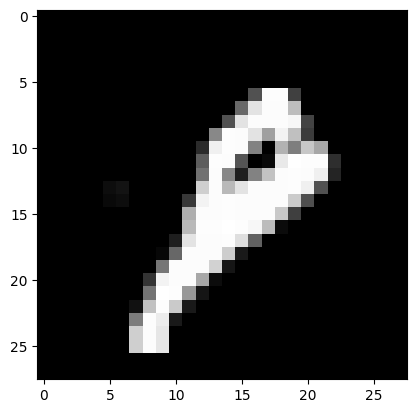

Prediction:  [7]
Label:  7


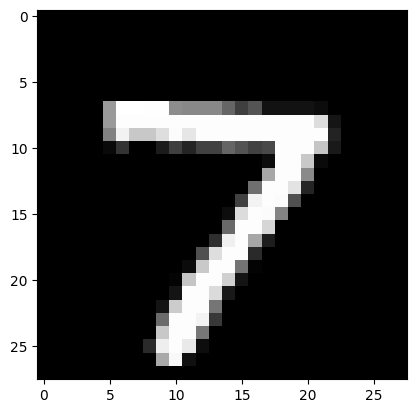

Prediction:  [0]
Label:  0


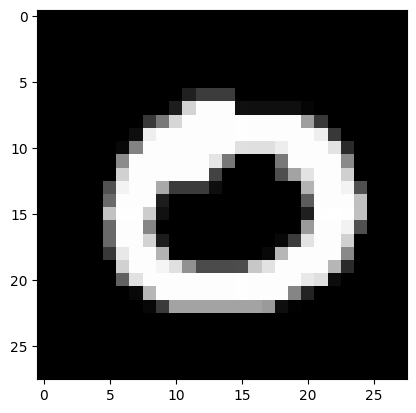

Prediction:  [5]
Label:  5


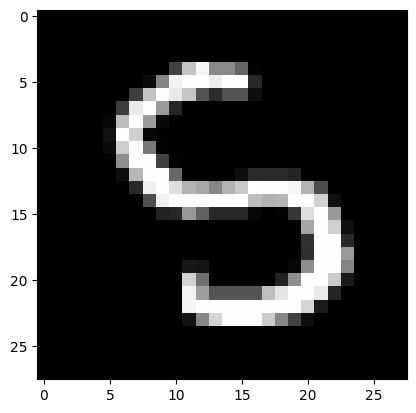

Prediction:  [7]
Label:  7


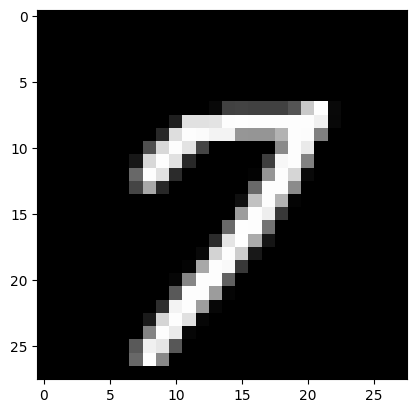

In [13]:
test_prediction(123, W1, b1, W2, b2)
test_prediction(124, W1, b1, W2, b2)
test_prediction(125, W1, b1, W2, b2)
test_prediction(126, W1, b1, W2, b2)
test_prediction(127, W1, b1, W2, b2)